In [ ]:
from ultralytics import YOLO

# Download and load the YOLO model (e.g., YOLOv8n - nano version)
model = YOLO('yolov8n.pt')  # You can replace 'yolov8n.pt' with other versions like 'yolov8s.pt', 'yolov8m.pt', etc.

# Print model information
print(model)

In [1]:
import pickle

# Load the .pkl file
with open('identity_database.pkl', 'rb') as file:
    db = pickle.load(file)

# Print keys and check if they have values (True/False)
for key, value in db.items():
    print(f"Key: {key}, Has Value: {bool(value)}")

# Print the entire database
print("Database contents:")
for key, value in db.items():
    print(f"{key}: {value}")
# Print the number of keys in the database
print(f"Number of keys in the database: {len(db)}")
# Print the type of the database
print(f"Type of the database: {type(db)}")
# Print the type of the first key in the database
print(f"Type of the first key in the database: {type(list(db.keys())[0])}")
# Print the type of the first value in the database
print(f"Type of the first value in the database: {type(list(db.values())[0])}")
# Print the first key and value in the database
print(f"First key: {list(db.keys())[0]}")
print(f"First value: {list(db.values())[0]}")
# Print the number of items in the database
print(f"Number of items in the database: {len(db)}")

#list the keys
print("Keys in the database:")
for key in db.keys():
    print(key)


Key: 33, Has Value: True
Key: 36, Has Value: True
Key: 37, Has Value: True
Key: 1, Has Value: True
Key: 2, Has Value: True
Key: 3, Has Value: True
Key: 4, Has Value: True
Key: 17, Has Value: True
Key: 45, Has Value: True
Key: 50, Has Value: True
Database contents:
33: {'name': 'Person_33', 'opengait': None, 'skeleton_gait': {'mean_stride_len': 0.011938492844606928, 'std_stride_len': 0.00821801399582706, 'mean_step_width': 0.19868351506923163, 'std_step_width': 0.027068328069309124, 'mean_hip_osc_y': 3.01028499526339e-16, 'mean_left_knee_angle': 177.94680736659205, 'mean_right_knee_angle': 176.95860704859638, 'mean_left_hip_angle': 174.30577563920195, 'mean_right_hip_angle': 172.3786485013503}, 'best_skeleton': [(619.6224975585938, 115.50289916992188, 0.6201515197753906), (620.444091796875, 113.85968017578125, 0.6703519821166992), (618.1846313476562, 113.6542739868164, 0.6489654183387756), (620.6494750976562, 114.68128967285156, 0.580511212348938), (615.1036376953125, 114.06507873535156

In [1]:
# Check if the database has 3D skeleton data
if '3D_skeleton' in db:
    print("The database contains 3D skeleton data.")
else:
    print("The database does not contain 3D skeleton data.")

NameError: name 'db' is not defined

In [3]:
import pickle

# Load the .pkl file
with open('identity_database1.pkl', 'rb') as file:
    db = pickle.load(file)

# Extract and display key information for each identity in the database
print("Identity Details Summary:")
print("-" * 80)
print(f"{'ID':<4} {'Name':<15} {'Height':<10} {'OpenGait':<10} {'3D Skeleton':<12} {'Skeleton Samples':<18} {'Merged IDs'}")
print("-" * 80)

for person_id, data in db.items():
    name = data.get('name', 'Unknown')
    height = f"{data.get('height', 'N/A'):.2f}" if isinstance(data.get('height'), (int, float)) else 'N/A'
    has_opengait = "✓" if data.get('opengait') is not None else "✗"
    has_3d_skeleton = "✓" if data.get('best_3d_skeleton') is not None else "✗"
    skeleton_samples = data.get('feature_quality', {}).get('skeleton_samples', 'N/A')
    merged_ids = ', '.join(map(str, data.get('merged_from', []))) if 'merged_from' in data else 'None'
    
    print(f"{person_id:<4} {name:<15} {height:<10} {has_opengait:<10} {has_3d_skeleton:<12} {skeleton_samples:<18} {merged_ids}")

print("\nAttribute Details:")
# Get a sample entry (first one)
sample_id = list(db.keys())[0]
sample_data = db[sample_id]

print("\nSample Entry ID:", sample_id)
print("Available attributes:", ", ".join(sample_data.keys()))

# Print statistics about OpenGait and 3D skeleton availability
opengait_count = sum(1 for data in db.values() if data.get('opengait') is not None)
skeleton_3d_count = sum(1 for data in db.values() if data.get('best_3d_skeleton') is not None)

print(f"\nOpenGait available: {opengait_count}/{len(db)} identities ({opengait_count/len(db)*100:.1f}%)")
print(f"3D Skeleton available: {skeleton_3d_count}/{len(db)} identities ({skeleton_3d_count/len(db)*100:.1f}%)")

# Check what's in the skeleton_gait and feature_quality dictionaries
if 'skeleton_gait' in sample_data and sample_data['skeleton_gait']:
    print("\nSkeleton gait features:", ", ".join(sample_data['skeleton_gait'].keys()))

if 'feature_quality' in sample_data:
    print("\nFeature quality metrics:", ", ".join(sample_data['feature_quality'].keys()))

Identity Details Summary:
--------------------------------------------------------------------------------
ID   Name            Height     OpenGait   3D Skeleton  Skeleton Samples   Merged IDs
--------------------------------------------------------------------------------
1    Prachit         164.70     ✓          ✓            946                None
2    Ashutosh        168.68     ✗          ✓            997                None
3    Ojasv           166.32     ✓          ✓            822                3, 18, 34
4    Nayan           165.67     ✓          ✓            549                4, 51
23   Aditya          167.77     ✗          ✓            863                11, 23, 27
35   Rohit           161.58     ✗          ✓            316                35, 36, 38, 63, 69, 75
48   Sunil           163.53     ✗          ✓            83                 48, 58, 66, 71

Attribute Details:

Sample Entry ID: 1
Available attributes: name, opengait, skeleton_gait, best_skeleton, best_3d_skeleton, 

In [3]:
import pickle
import pandas as pd
import numpy as np


# Path to the pickle file (you should replace this with the actual file path)
pkl_file_path = 'identity_database.pkl'

# Load the dataset from the pickle file
with open(pkl_file_path, 'rb') as file:
    dataset = pickle.load(file)

# Now you can inspect the dataset
print(dataset)


{33: {'name': 'Person_33', 'opengait': None, 'skeleton_gait': {'mean_stride_len': 0.011938492844606928, 'std_stride_len': 0.00821801399582706, 'mean_step_width': 0.19868351506923163, 'std_step_width': 0.027068328069309124, 'mean_hip_osc_y': 3.01028499526339e-16, 'mean_left_knee_angle': 177.94680736659205, 'mean_right_knee_angle': 176.95860704859638, 'mean_left_hip_angle': 174.30577563920195, 'mean_right_hip_angle': 172.3786485013503}, 'best_skeleton': [(619.6224975585938, 115.50289916992188, 0.6201515197753906), (620.444091796875, 113.85968017578125, 0.6703519821166992), (618.1846313476562, 113.6542739868164, 0.6489654183387756), (620.6494750976562, 114.68128967285156, 0.580511212348938), (615.1036376953125, 114.06507873535156, 0.6677430868148804), (621.060302734375, 123.30819702148438, 0.6626133918762207), (609.1469116210938, 123.10279083251953, 0.6789076328277588), (623.7305297851562, 136.04315185546875, 0.638034999370575), (604.4226684570312, 137.07017517089844, 0.6490359902381897),

In [4]:
# Check the type of the dataset
print(f"Dataset Type: {type(dataset)}")

# If the dataset is a DataFrame (e.g., from pandas), use this to inspect its structure
if isinstance(dataset, pd.DataFrame):
    print("Dataset is a pandas DataFrame")
    print(f"Columns: {dataset.columns}")
    print(f"Shape of DataFrame: {dataset.shape}")
    print(dataset.head())  # Displays the first 5 rows

# If the dataset is a dictionary, list, or other structure, check its keys, length, or elements
elif isinstance(dataset, dict):
    print("Dataset is a dictionary")
    print(f"Keys: {list(dataset.keys())}")
    print(f"Number of items: {len(dataset)}")
    # Optionally, print the first item for inspection
    print(f"First item: {dataset.get(list(dataset.keys())[0])}")

elif isinstance(dataset, list):
    print("Dataset is a list")
    print(f"Length of list: {len(dataset)}")
    # Optionally, print the first few elements
    print(f"First few items: {dataset[:5]}")

else:
    print("Dataset type is not specifically handled. Inspect manually.")
    print(dataset)


Dataset Type: <class 'dict'>
Dataset is a dictionary
Keys: [33, 36, 37, 1, 2, 3, 4, 17, 45, 50]
Number of items: 10
First item: {'name': 'Person_33', 'opengait': None, 'skeleton_gait': {'mean_stride_len': 0.011938492844606928, 'std_stride_len': 0.00821801399582706, 'mean_step_width': 0.19868351506923163, 'std_step_width': 0.027068328069309124, 'mean_hip_osc_y': 3.01028499526339e-16, 'mean_left_knee_angle': 177.94680736659205, 'mean_right_knee_angle': 176.95860704859638, 'mean_left_hip_angle': 174.30577563920195, 'mean_right_hip_angle': 172.3786485013503}, 'best_skeleton': [(619.6224975585938, 115.50289916992188, 0.6201515197753906), (620.444091796875, 113.85968017578125, 0.6703519821166992), (618.1846313476562, 113.6542739868164, 0.6489654183387756), (620.6494750976562, 114.68128967285156, 0.580511212348938), (615.1036376953125, 114.06507873535156, 0.6677430868148804), (621.060302734375, 123.30819702148438, 0.6626133918762207), (609.1469116210938, 123.10279083251953, 0.6789076328277588

In [18]:
# First, print out the lengths of all lists in aggregated_data to identify the issue
for feature_name, values in aggregated_data.items():
    print(f"Feature: {feature_name}, Length: {len(values)}")

# If the lengths are not consistent, we can either:
# - Truncate longer lists to the length of the shortest one
# - Or handle missing data by filling it in

# Option 1: Truncate to the shortest length
min_length = min(len(values) for values in aggregated_data.values())
for feature_name in aggregated_data:
    aggregated_data[feature_name] = aggregated_data[feature_name][:min_length]

# Now we can create the DataFrame
aggregated_df = pd.DataFrame.from_dict(aggregated_data)

# Show the first few rows to inspect the data
print(aggregated_df.head())


Feature: name, Length: 10
Feature: opengait, Length: 10
Feature: skeleton_gait, Length: 10
Feature: best_skeleton, Length: 10
Feature: best_3d_skeleton, Length: 10
Feature: industrial_pose, Length: 10
Feature: body_ratios, Length: 10
Feature: height, Length: 10
Feature: motion_pattern, Length: 10
Feature: context, Length: 10
Feature: industrial_color, Length: 10
Feature: feature_quality, Length: 10
Feature: merged_from, Length: 4
        name                                           opengait  \
0  Person_33                                               None   
1  Person_36                                               None   
2  Person_37                                               None   
3    Prachit  [0.16782007, 0.19491595, 0.0026449226, 0.10500...   

                                       skeleton_gait  \
0  {'mean_stride_len': 0.011938492844606928, 'std...   
1                                                 {}   
2  {'mean_stride_len': 0.011868775610514783, 'std...   
3  {'m

In [6]:
import pickle
import pandas as pd
import numpy as np

# Path to the pickle file (you should replace this with the actual file path)
pkl_file_path = 'identity_database.pkl'

# Load the dataset from the pickle file
with open(pkl_file_path, 'rb') as file:
    dataset = pickle.load(file)

# Inspect the dataset
print(dataset)

# Check the type of the dataset
print(f"Dataset Type: {type(dataset)}")

# If the dataset is a DataFrame (e.g., from pandas), use this to inspect its structure
if isinstance(dataset, pd.DataFrame):
    print("Dataset is a pandas DataFrame")
    print(f"Columns: {dataset.columns}")
    print(f"Shape of DataFrame: {dataset.shape}")
    print(dataset.head())  # Displays the first 5 rows

# If the dataset is a dictionary, list, or other structure, check its keys, length, or elements
elif isinstance(dataset, dict):
    print("Dataset is a dictionary")
    print(f"Keys: {list(dataset.keys())}")
    print(f"Number of items: {len(dataset)}")
    # Optionally, print the first item for inspection
    print(f"First item: {dataset.get(list(dataset.keys())[0])}")

elif isinstance(dataset, list):
    print("Dataset is a list")
    print(f"Length of list: {len(dataset)}")
    # Optionally, print the first few elements
    print(f"First few items: {dataset[:5]}")

else:
    print("Dataset type is not specifically handled. Inspect manually.")
    print(dataset)

# Assuming the 'aggregated_data' variable is part of your dataset
# Check if 'aggregated_data' is defined correctly in your dataset
aggregated_data = dataset.get('aggregated_data', {})

# Check if aggregated_data is empty
if not aggregated_data:
    print("Aggregated data is empty.")
else:
    # First, print out the lengths of all lists in aggregated_data to identify the issue
    for feature_name, values in aggregated_data.items():
        print(f"Feature: {feature_name}, Length: {len(values)}")

    # Only proceed if the dictionary isn't empty
    if aggregated_data:
        # Option 1: Truncate to the shortest length (Handle case where the dictionary isn't empty)
        min_length = min(len(values) for values in aggregated_data.values() if len(values) > 0)
        print(f"Minimum Length: {min_length}")

        for feature_name in aggregated_data:
            # Avoid empty lists or None values
            if aggregated_data[feature_name]:
                aggregated_data[feature_name] = aggregated_data[feature_name][:min_length]

        # Now we can create the DataFrame
        aggregated_df = pd.DataFrame.from_dict(aggregated_data)

        # Show the first few rows to inspect the data
        print("Aggregated DataFrame (After Truncation):")
        print(aggregated_df.head())

        # Optionally, if there's a specific feature like 'merged_from' that has inconsistent lengths:
        # Remove rows where 'merged_from' is incomplete (length < 10)
        if 'merged_from' in aggregated_data:
            max_length = 10  # Adjust this as necessary
            aggregated_data['merged_from'] = aggregated_data['merged_from'][:max_length]

        # Now create the DataFrame again if needed
        aggregated_df = pd.DataFrame.from_dict(aggregated_data)

        # Show the first few rows to inspect the data
        print("Aggregated DataFrame (After 'merged_from' Adjustment):")
        print(aggregated_df.head())


{33: {'name': 'Person_33', 'opengait': None, 'skeleton_gait': {'mean_stride_len': 0.011938492844606928, 'std_stride_len': 0.00821801399582706, 'mean_step_width': 0.19868351506923163, 'std_step_width': 0.027068328069309124, 'mean_hip_osc_y': 3.01028499526339e-16, 'mean_left_knee_angle': 177.94680736659205, 'mean_right_knee_angle': 176.95860704859638, 'mean_left_hip_angle': 174.30577563920195, 'mean_right_hip_angle': 172.3786485013503}, 'best_skeleton': [(619.6224975585938, 115.50289916992188, 0.6201515197753906), (620.444091796875, 113.85968017578125, 0.6703519821166992), (618.1846313476562, 113.6542739868164, 0.6489654183387756), (620.6494750976562, 114.68128967285156, 0.580511212348938), (615.1036376953125, 114.06507873535156, 0.6677430868148804), (621.060302734375, 123.30819702148438, 0.6626133918762207), (609.1469116210938, 123.10279083251953, 0.6789076328277588), (623.7305297851562, 136.04315185546875, 0.638034999370575), (604.4226684570312, 137.07017517089844, 0.6490359902381897),

In [5]:
import pickle

# Load the dataset
with open('identity_database1.pkl', 'rb') as file:
    dataset = pickle.load(file)

# Filter out low quality entries based on heuristic
def is_low_quality(entry):
    if not isinstance(entry, dict):
        return True
    if entry.get('opengait') is not None:
        return False  # Has opengait = better quality
    skeleton = entry.get('skeleton_gait')
    if not skeleton:
        return True
    if skeleton.get('mean_stride_len', 0) < 0.01:
        return True
    return False

# Remove low quality entries
filtered_dataset = {k: v for k, v in dataset.items() if not is_low_quality(v)}

# Print remaining keys
print("\nRemaining keys after removing low quality entries:")
print(list(filtered_dataset.keys()))

# Optional: summary of removed vs. retained
removed = [k for k in dataset if k not in filtered_dataset]
print(f"\nRemoved low-quality keys: {removed}")
print(f"Total retained: {len(filtered_dataset)}, Total removed: {len(removed)}")



Remaining keys after removing low quality entries:
[1, 2, 3, 4, 23, 48]

Removed low-quality keys: [35]
Total retained: 6, Total removed: 1


In [6]:
# Save the filtered dataset back to a pickle file
with open('filtered_identity_database.pkl', 'wb') as file:
    pickle.dump(filtered_dataset, file)
# Print the number of entries in the filtered dataset
print(f"\nNumber of entries in the filtered dataset: {len(filtered_dataset)}")


Number of entries in the filtered dataset: 6


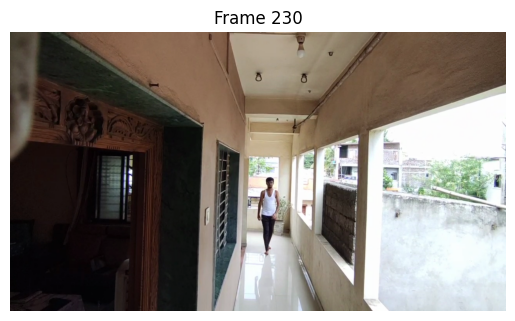

In [15]:
# Show frame number 1500 from the video
import cv2
import matplotlib.pyplot as plt

# Load the video
video_path = 'input/p.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)
frame_number = 230  # Frame number to display
# Set the video to the desired frame
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
# Read the frame
ret, frame = cap.read()
if ret:
    # Convert BGR to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Display the frame
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.title(f"Frame {frame_number}")
    plt.show()
# Release the video capture object
cap.release()
# Close all OpenCV windows